In [1]:
%%html
<img src="http://photos4.meetupstatic.com/photos/event/8/1/0/4/600_448353028.jpeg">

In [14]:
%%javascript
$(".repository-content, .container").css("width", "90%")
$("body, #outer-dashboard, .navbar-default").css("background-color", "peachpuff")
$(".navbar-default").css("background-color", "lightblue")

<IPython.core.display.Javascript object>

In [3]:
%matplotlib inline

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [4]:
import datetime
from math import pi

import matplotlib.pyplot as plt
import requests

import zmq
from zmq.eventloop.zmqstream import ZMQStream

from IPython.display import display
from ipywidgets import interact, widgets

from bokeh.io import push_notebook
from bokeh.models import ColumnDataSource
from bokeh.models import DatetimeTickFormatter, HoverTool
from bokeh.plotting import figure, show, output_notebook

from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS

In [5]:
output_notebook(hide_banner=True);

In [6]:
URL_MAP = {'25th PyData': 232533453, '24th PyData': 231933936, '23rd PyData': 231094316, "Today's PyData": 233441395, 'Select a Meetup': None}

In [7]:
def make_wordcloud(url):
    html = requests.get(url).text
    soup = BeautifulSoup(html, 'html.parser')
    text = soup.find('div', id=['past-event-description-wrap', 'event-description-wrap']).get_text()
    wc = WordCloud(stopwords=STOPWORDS | {'will', 'book', 'code'}, background_color='black', width=1000,
                   height=600).generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

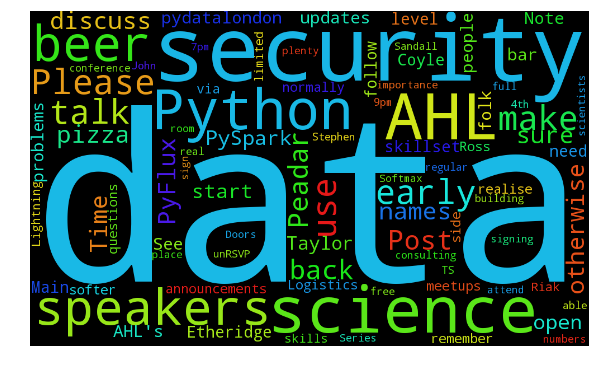

In [8]:
@interact(meetup_id=widgets.Dropdown(value=None, description='Select a Meetup', options=URL_MAP))
def render(meetup_id):
    if meetup_id:
        make_wordcloud(r'http://www.meetup.com/PyData-London-Meetup/events/{}/'.format(meetup_id))

In [9]:
class LivePlot(object):
    PORT = 5556

    def __init__(self, topic=None):
        self.topic = topic or ''
        self.source = ColumnDataSource(data={'x': [], 'y': []})
        self.plot = None

    def make(self):
        self.make_plot()
        self.make_text()
        self.subscribe()

    def subscribe(self):
        ctx = zmq.Context()
        sock = ctx.socket(zmq.SUB)
        sock.connect('tcp://localhost:{}'.format(self.PORT))
        sock.setsockopt_string(zmq.SUBSCRIBE, '')
        stream = ZMQStream(sock)
        stream.on_recv(self.callback)

    def set_topic(self, sender):
        self.topic = self.input_widget.value.upper()
        self.topic_widget.value = self.topic
        self.source.data['x'] = []
        self.source.data['y'] = []

    def make_plot(self):
        self.plot = figure(
            plot_height=300,
            plot_width=500,
            background_fill_color='peachpuff',
            border_fill_color='peachpuff',
            x_axis_type='datetime',
            logo=None,
            tools='pan,wheel_zoom,box_zoom,reset,resize,crosshair,hover'
        )
        self.plot.circle('x', 'y', source=self.source, color='blue', size=7)
        self.plot.line('x', 'y', source=self.source, color='crimson', alpha=0.5, line_width=2)
        fmt = '%H:%M:%S'
        self.plot.xaxis.formatter = DatetimeTickFormatter(formats={k: [fmt] for k in [
            'microseconds', 'milliseconds', 'seconds',
            'minsec', 'minutes', 'hourmin', 'hours',
            'days', 'months', 'years'
        ]})
        self.plot.xaxis.major_label_orientation = pi / 4
        hover = self.plot.select(dict(type=HoverTool))
        hover.tooltips = [
            ("Value", "$y"),
        ]
        self.handle = show(self.plot)

    def make_text(self):
        self.input_widget = widgets.Text(value='', placeholder='Enter a ticker')
        display(self.input_widget)
        self.input_widget.on_submit(callback=self.set_topic)
        self.topic_widget = widgets.HTML(value='')
        display(self.topic_widget)
        self.text_widget = widgets.HTML(value='')
        display(self.text_widget)

    def callback(self, msg):
        msg_text = msg[0].decode('utf-8').rpartition(' ')
        if self.topic == msg_text[0]:
            payload = float(msg_text[-1])
            x = datetime.datetime.now()
            self.source.data['x'].append(x)
            self.source.data['y'].append(payload)
            self.text_widget.value = '{} @ {}'.format(payload, x)
            push_notebook(handle=self.handle)
            

In [10]:
LivePlot().make()

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"
Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"
Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


In [11]:
LivePlot().make()

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"
Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"
Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


In [12]:
LivePlot().make()

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"
Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"
Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


In [13]:
LivePlot().make()

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"
Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"
Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"
